# Title

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="9037071e37ec172af7425e2456b141a1322dc872aec8e887ef32fe92c7c3b7f656fc06773f7d8bd72d4a4be432413719d0920ee13aa72ea659888e0c58298d43", 
                                  set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit.random import random_circuit
from qiskit.providers.basic_provider import BasicSimulator

# Returning random quantum circuit given num_q and depth of circuit
def get_random_qc(num_q, depth):
    q = QuantumRegister(noq)
    circ = random_circuit(num_q, depth, measure=False)
    return circ

# Returning 'n' output arrays for given circuit
def get_circuit_output(circ, n):
    output = [dict() for x in range(n)]
    circ.measure_all()
    backend = BasicSimulator()
    tqc = transpile(circuit, backend)
    for i in range(0,n):
        counts = backend.run(tqc).result().get_counts()
        print(counts)
        output[i] = counts    

# Main Function -- Calling Random Circuit Generator
noq = 3
depth = 4
runs = 5

circuit = get_random_qc(noq, depth)
get_circuit_output(circuit, runs)

### Random circuit - Measure in 3 diff basis, and store output as dictionary of dictionaries

In [48]:
from qiskit import transpile
from qiskit.circuit.library import HGate, SdgGate
from qiskit.providers.basic_provider import BasicSimulator

class Measurement_Op:
    # parametrized constructor 
    def __init__(self, noq, circuit, runs): 
        self.num = noq 
        self.circuit = circuit 
        self.runs = runs

    # Defining output object (for storing measurement outcomes)
    @staticmethod
    def get_output_obj():
        keyList = ["X", "Y", "Z"]
        obj = {}
        for i in keyList:
            obj[i] = None
        return obj

    # Circuit measurement and storing the output on given key
    @staticmethod
    def measure_circuit(circ, obj, key):
        circ.measure_all()
        backend = BasicSimulator()
        tqc = transpile(circ, backend) 
        counts = backend.run(tqc).result().get_counts()
        obj.update({key:counts})
        circ.remove_final_measurements()

    # Measuring given circuit in X, Y, Z basis
    def get_output(self):
        obj = self.get_output_obj() 
        
        # Measurement in X basis 
        tempCirc = self.circuit.copy()
        tempCirc.append(HGate(), [range(0,noq)])
        self.measure_circuit(tempCirc, obj, "X")
        
        # Measurement in Y basis
        tempCirc = self.circuit.copy()
        tempCirc.append(HGate(), [range(0,noq)])
        tempCirc.append(SdgGate(), [range(0,noq)])
        self.measure_circuit(tempCirc, obj, "Y")
        
        # # Measurement in Z basis
        self.measure_circuit(self.circuit, obj, "Z")
        return obj

    # Returning 'runs' number of output arrays for given circuit
    def get_circuit_output(self):
        output = [dict() for x in range(self.runs)]
        for i in range(0,self.runs):
            result = self.get_output()
            print(result)
            output[i] = result 
        return output

Circuit measurement outcomes:
{'X': {'100': 126, '011': 139, '101': 138, '110': 128, '000': 126, '010': 130, '111': 119, '001': 118}, 'Y': {'101': 134, '100': 133, '010': 123, '011': 128, '000': 124, '111': 116, '001': 130, '110': 136}, 'Z': {'111': 515, '001': 509}}
{'X': {'110': 130, '000': 129, '011': 142, '111': 129, '101': 127, '010': 130, '100': 141, '001': 96}, 'Y': {'001': 130, '101': 122, '110': 126, '011': 123, '010': 127, '111': 115, '000': 138, '100': 143}, 'Z': {'111': 517, '001': 507}}


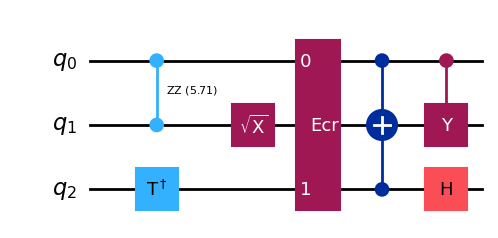

In [62]:
from qiskit.circuit.random import random_circuit

# Returning random quantum circuit given num_q and depth of circuit
def get_random_qc(noq, depth):
    circ = random_circuit(noq, depth, measure=False)
    return circ

# Main Function -- Calling Random Circuit Generator
noq = 3
depth = 4
runs = 2

circuit = get_random_qc(noq, depth)
print("Circuit measurement outcomes:")
outputObj = Measurement_Op(noq, circuit, runs)
circuitOutput = outputObj.get_circuit_output()
circuit.draw(output='mpl')

### Add noise to existing circuit and measure fidelity

In [79]:
import numpy as np
from qiskit.quantum_info.analysis import hellinger_fidelity

noiseCirc = circuit.copy()
noiseCirc.r(np.pi/2, 0, 0)

print("Noisy circuit measurment outcomes:")
outputObj = Measurement_Op(noq, noiseCirc, runs)
noiseCircOutput = outputObj.get_circuit_output()
noiseCirc.draw("mpl")

def get_fidelity(op1, op2, basis):
    res1 = op1.get(basis)
    res2 = op2.get(basis)
    print("Circuit - "+str(res1))
    print("Noisy C - "+str(res2))
    return hellinger_fidelity(res1, res2)

for i in range(0, runs):
    print('\nRUN ' + str(i) + ":")
    for b in ("X","Y","Z"):
        fidelity = get_fidelity(circuitOutput[i], noiseCircOutput[i], b)
        print("In basis "+b+", fidelity = " + str(fidelity))
    

Noisy circuit measurment outcomes:
{'X': {'010': 128, '110': 130, '011': 124, '100': 126, '111': 138, '000': 136, '001': 109, '101': 133}, 'Y': {'111': 116, '010': 122, '001': 124, '110': 138, '100': 130, '000': 126, '011': 144, '101': 124}, 'Z': {'000': 269, '110': 251, '111': 247, '001': 257}}
{'X': {'111': 130, '001': 128, '000': 118, '011': 132, '101': 128, '100': 122, '010': 136, '110': 130}, 'Y': {'000': 118, '001': 127, '011': 132, '110': 115, '111': 147, '100': 112, '010': 154, '101': 119}, 'Z': {'110': 266, '111': 260, '000': 264, '001': 234}}

RUN 0:
Circuit - {'100': 126, '011': 139, '101': 138, '110': 128, '000': 126, '010': 130, '111': 119, '001': 118}
Noisy C - {'010': 128, '110': 130, '011': 124, '100': 126, '111': 138, '000': 136, '001': 109, '101': 133}
In basis X, fidelity = 0.9984747724210863
Circuit - {'101': 134, '100': 133, '010': 123, '011': 128, '000': 124, '111': 116, '001': 130, '110': 136}
Noisy C - {'111': 116, '010': 122, '001': 124, '110': 138, '100': 130,